# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC 

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset. 

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


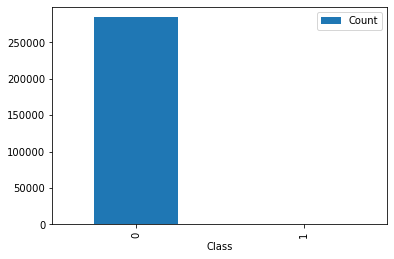

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

Using `Class` for the y values (target feature)

In [9]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [11]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Support Vector Machine Classifier Model

### Train the Model

In [12]:
svmModel = SVC(kernel='linear',probability=True)
svmModel

SVC(kernel='linear', probability=True)

In [13]:
svmModel.fit(X_train_scaled, y_train.flatten())

SVC(kernel='linear', probability=True)

In [14]:
print(f"Training Data Score: {svmModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svmModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.9993960815523981
Testing Data Score: 0.9993539507317211


In [15]:
# Make predictions with the model
svmModelPredictions = svmModel.predict(X_test_scaled)

In [16]:
svmModelPredictProba = svmModel.predict_proba(X_test_scaled)[:,1]

In [17]:
# Print classification report
print(classification_report(y_test.flatten(), svmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), svmModelPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.80      0.79      0.79       113

      accuracy                           1.00     71202
     macro avg       0.90      0.89      0.90     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9993539507317211


Support Vector Machine Classifier
Accuracy:  0.9993539507317211
Precision:  0.8018018018018018
Recall:  0.7876106194690266
F1-Score:  0.7946428571428571
AUC score:  0.8936505741214086
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.80      0.79      0.79       113

      accuracy                           1.00     71202
     macro avg       0.90      0.89      0.90     71202
  weighted avg       1.00      1.00      1.00     71202



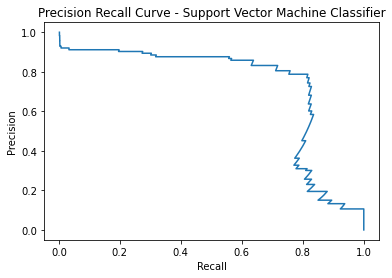

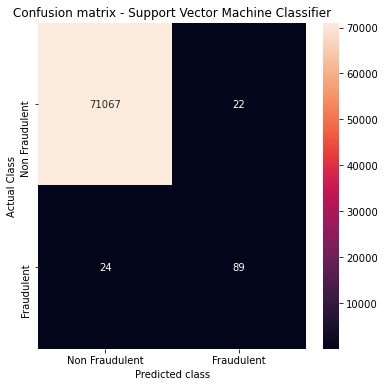

In [18]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), svmModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), svmModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), svmModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), svmModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), svmModelPredictions))
print(classification_report(y_test.flatten(), svmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), svmModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), svmModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
svmModel.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [21]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
svmModelParamGrid = {
#                         'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'gamma': ['scale','auto'],
                     'shrinking':[True, False],
                     'probability': [True, False],
#                      'class_weight': [{0:99, 1:1}, 'balanced', None],
                         'decision_function_shape': ['ovo', 'ovr']
                         }
svmModelGrid = GridSearchCV(svmModel, svmModelParamGrid, verbose=3)

In [22]:
# Train the model with GridSearch
svmModelGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  37.7s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.6s remaining:    0.0s


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  34.6s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  34.8s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  36.0s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  36.6s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False, score=0.999, total=  39.7s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False, score=0.999, total=  30.6s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scal

[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  32.4s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  30.3s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  30.7s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  31.3s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  31.4s
[CV] decision_function_shape=ovr, gamma=scale, probability=False, shrinking=True 
[CV]  decision_function_shape=ovr, gamma

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 23.3min finished


GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             verbose=3)

In [23]:
print(svmModelGrid.best_params_)
print(svmModelGrid.best_score_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'probability': True, 'shrinking': True}
0.9993960815523982


In [25]:
# Make predictions with the hyperparameter tuned model
svmModelGridPredictions = svmModelGrid.predict(X_test_scaled)

In [26]:
# Print classification report
print(classification_report(y_test.flatten(), svmModelGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.80      0.79      0.79       113

      accuracy                           1.00     71202
     macro avg       0.90      0.89      0.90     71202
  weighted avg       1.00      1.00      1.00     71202



In [44]:
hypertunedsvmModel = SVC(decision_function_shape = 'ovo', 
                         gamma = 'scale', 
                         probability = True, 
                         shrinking = True)
hypertunedsvmModel

SVC(decision_function_shape='ovo', probability=True)

In [45]:
hypertunedsvmModel.fit(X_train_scaled, y_train.flatten())

SVC(decision_function_shape='ovo', probability=True)

In [46]:
print(f"Training Data Score: {hypertunedsvmModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedsvmModel.score(X_test_scaled, y_test)}")

Training Data Score: 0.9994054446291051
Testing Data Score: 0.9992696834358585


In [47]:
hypertunedsvmModelPredictions = hypertunedsvmModel.predict(X_test_scaled)

In [48]:
hypertunedsvmModelPredictProba = hypertunedsvmModel.predict_proba(X_test_scaled)[:,1]

In [49]:
# Calculate classification report
print(classification_report(y_test.flatten(), hypertunedsvmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.75      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



Support Vector Machine Classifier
Accuracy:  0.9992696834358585
Precision:  0.7520661157024794
Recall:  0.8053097345132744
F1-Score:  0.7777777777777778
AUC score:  0.902443864147858
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.75      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



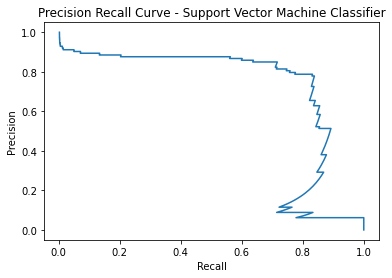

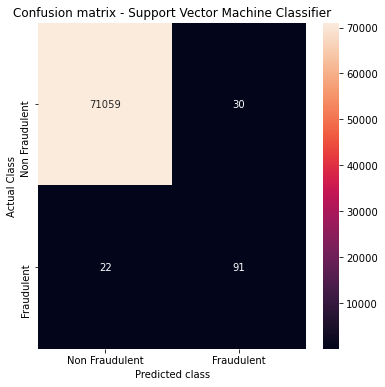

In [50]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), hypertunedsvmModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), hypertunedsvmModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), hypertunedsvmModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), hypertunedsvmModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), hypertunedsvmModelPredictions))
print(classification_report(y_test.flatten(), hypertunedsvmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), hypertunedsvmModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), hypertunedsvmModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Feature Selection

## Choosing Top features

In [52]:
# Set top features. This will be used as x values.
top_features = df[[ 
'V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16', 'V4', 'V11']]

top_features.head(1)

,V17,V14,V12,V10,V7,V3,V16,V4,V11
0,0.207971,-0.311169,-0.617801,0.090794,0.239599,2.536347,-0.470401,1.378155,-0.5516


### Create a Train Test Split

Use `Class` for the y values

In [53]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

top_X = top_features
top_y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

Shape:  (284807, 9) (284807, 1)


In [54]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=42)

In [55]:
print(top_X_train.shape,top_X_test.shape,top_y_train.shape, top_y_test.shape)

(213605, 9) (71202, 9) (213605, 1) (71202, 1)


### Pre-processing

Scale the data using the MinMaxScaler

In [56]:
top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

# SVM Model with Top features

### Train the Model

In [63]:
top_sfmModel = SVC(probability=True)
top_sfmModel

SVC(probability=True)

In [64]:
top_sfmModel.fit(top_X_train_scaled, top_y_train.flatten())

SVC(probability=True)

In [65]:
print(f"Training Data Score: {top_sfmModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_sfmModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 0.9994101261674586
Testing Data Score: 0.9992977725344794


In [66]:
# Make predictions
top_sfmPredictions = top_sfmModel.predict(top_X_test_scaled)

In [67]:
top_sfmPredictProba = top_sfmModel.predict_proba(top_X_test_scaled)[:,1]

In [68]:
print(classification_report(top_y_test.flatten(), top_sfmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_sfmPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.76      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9992977725344794


SVM Classifier
Accuracy:  0.9992977725344794
Precision:  0.7647058823529411
Recall:  0.8053097345132744
F1-Score:  0.7844827586206896
AUC score:  0.9024579310217768
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.76      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



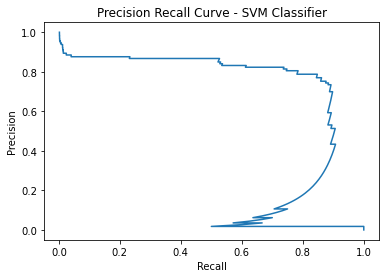

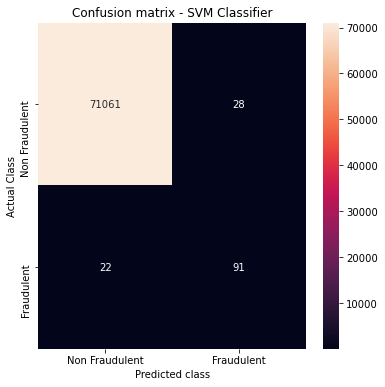

In [71]:
print("SVM Classifier")
print("==============")
print("Accuracy: ",accuracy_score(top_y_test.flatten(), top_sfmPredictions)) 
print("Precision: ",precision_score(top_y_test.flatten(), top_sfmPredictions))
print("Recall: ",recall_score(top_y_test.flatten(), top_sfmPredictions))
print("F1-Score: ",f1_score(top_y_test.flatten(), top_sfmPredictions))
print("AUC score: ",roc_auc_score(top_y_test.flatten(), top_sfmPredictions))
print(classification_report(top_y_test.flatten(), top_sfmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(top_y_test.flatten(), top_sfmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - SVM Classifier')

top_14confusionMatrix = confusion_matrix(top_y_test.flatten(), top_sfmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(top_14confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - SVM Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [70]:
top_sfmModel.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [72]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
top_sfmParamGrid = {
                        'gamma': ['scale','auto'],
                     'shrinking':[True, False],
                     'probability': [True, False],
                         'decision_function_shape': ['ovo', 'ovr']
                         }
top_sfmGrid = GridSearchCV(top_sfmModel, top_sfmParamGrid, verbose=3)

In [73]:
# Train the model with GridSearch
top_sfmGrid.fit(top_X_train_scaled, top_y_train.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  22.9s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.8s remaining:    0.0s


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  21.6s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.4s remaining:    0.0s


[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  20.8s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  22.7s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=True, score=0.999, total=  22.2s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False, score=0.999, total=  22.2s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False, score=0.999, total=  21.4s
[CV] decision_function_shape=ovo, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovo, gamma=scal

[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  21.3s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  20.0s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  20.1s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  21.0s
[CV] decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False 
[CV]  decision_function_shape=ovr, gamma=scale, probability=True, shrinking=False, score=0.999, total=  20.8s
[CV] decision_function_shape=ovr, gamma=scale, probability=False, shrinking=True 
[CV]  decision_function_shape=ovr, gamma

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 18.3min finished


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             verbose=3)

In [74]:
print(top_sfmGrid.best_params_)
print(top_sfmGrid.best_score_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'probability': True, 'shrinking': True}
0.9994101261674586


In [75]:
# Make predictions with the hyperparameter tuned model
top_sfmGridPredictions = top_sfmGrid.predict(top_X_test_scaled)

In [76]:
print(classification_report(top_y_test.flatten(), top_sfmGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.76      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



In [78]:
top_hypertunedSvmModel = SVC(gamma = 'scale',
                             shrinking = True,
                             probability = True,
                             decision_function_shape= 'ovo')
top_hypertunedSvmModel

SVC(decision_function_shape='ovo', probability=True)

In [79]:
top_hypertunedSvmModel.fit(top_X_train_scaled, top_y_train.flatten())

SVC(decision_function_shape='ovo', probability=True)

In [80]:
print(f"Training Data Score: {top_hypertunedSvmModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_hypertunedSvmModel.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 0.9994101261674586
Testing Data Score: 0.9992977725344794


In [81]:
top_hypertunedSvmModelPredictions = top_hypertunedSvmModel.predict(top_X_test_scaled)

In [82]:
top_hypertunedSvmModelPredictProba = top_hypertunedSvmModel.predict_proba(top_X_test_scaled)[:,1]

In [83]:
print(classification_report(top_y_test.flatten(), top_hypertunedSvmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.76      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



SVM Classifier
Accuracy:  0.9992977725344794
Precision:  0.7647058823529411
Recall:  0.8053097345132744
F1-Score:  0.7844827586206896
AUC score:  0.9024579310217768
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.76      0.81      0.78       113

      accuracy                           1.00     71202
     macro avg       0.88      0.90      0.89     71202
  weighted avg       1.00      1.00      1.00     71202



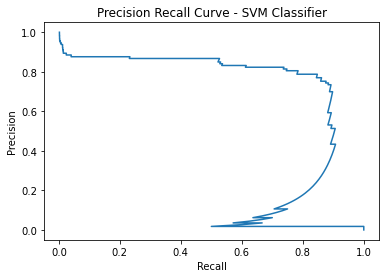

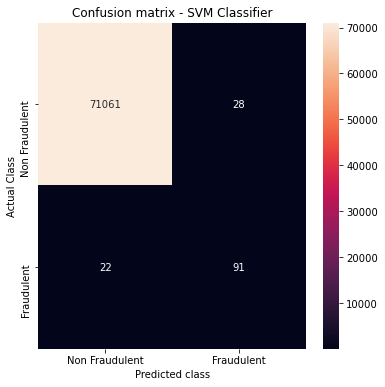

In [84]:
print("SVM Classifier")
print("========================")
print("Accuracy: ",accuracy_score(top_y_test.flatten(), top_hypertunedSvmModelPredictions)) 
print("Precision: ",precision_score(top_y_test.flatten(), top_hypertunedSvmModelPredictions))
print("Recall: ",recall_score(top_y_test.flatten(), top_hypertunedSvmModelPredictions))
print("F1-Score: ",f1_score(top_y_test.flatten(), top_hypertunedSvmModelPredictions))
print("AUC score: ",roc_auc_score(top_y_test.flatten(), top_hypertunedSvmModelPredictions))
print(classification_report(top_y_test.flatten(), top_hypertunedSvmModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(top_y_test.flatten(), top_hypertunedSvmModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - SVM Classifier')

top_14confusionMatrix = confusion_matrix(top_y_test.flatten(), top_hypertunedSvmModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(top_14confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - SVM Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Save the Model

In [85]:
filename = 'SVMClassifierModel.sav'
joblib.dump(top_sfmModel, filename)

['SVMClassifierModel.sav']